In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel('/content/sample_data/Online Retail.xlsx')

In [13]:
df.dropna(inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df.describe())
top_products = df['StockCode'].value_counts().head(5)
print(top_products)
top_countries = df['Country'].value_counts().head(5)
print(top_countries)

            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  
StockCode
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
Name: count, dtype: int64
Country
United Kingdom    361878
Germany           

<Figure size 1000x600 with 0 Axes>

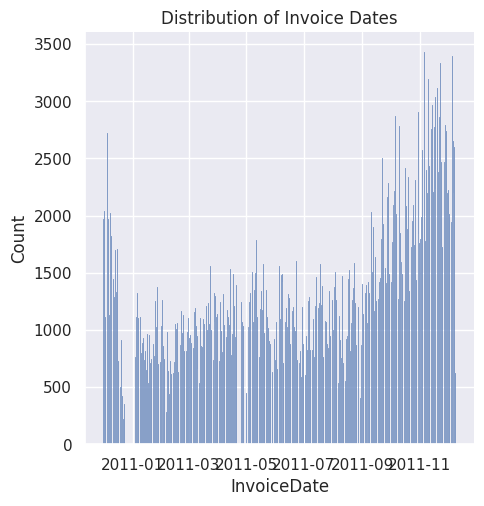

In [16]:
sns.set()
plt.figure(figsize=(10, 6))
sns.displot(df['InvoiceDate'].dt.date)
plt.title('Distribution of Invoice Dates')
plt.show()

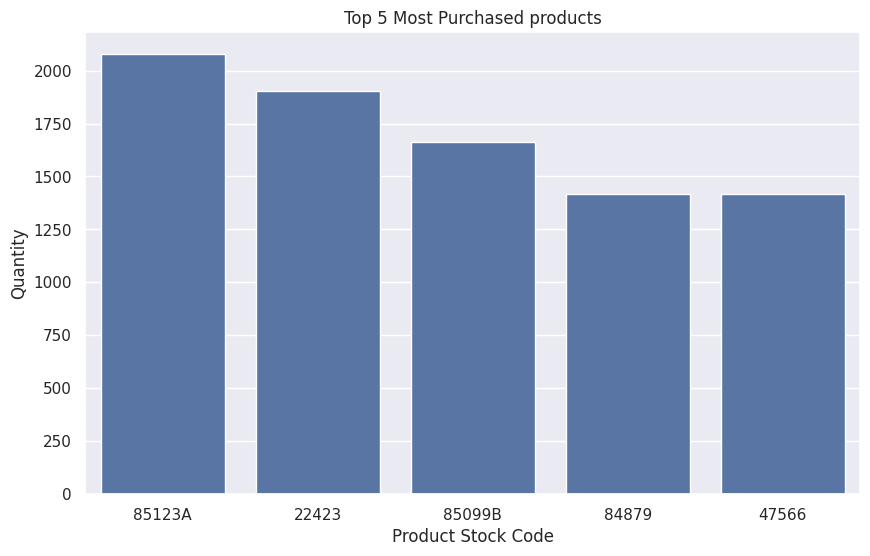

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 5 Most Purchased products')
plt.xlabel('Product Stock Code')
plt.ylabel('Quantity')
plt.show()

In [18]:
df['CustomerAge'] = df['InvoiceDate'].dt.year - df['CustomerID'].apply(lambda x: int(str(x)[:4]))
young_customers = df[df['CustomerAge'] < 30]
middle_aged_customers = df[(df['CustomerAge'] >= 30) & (df['CustomerAge'] < 60)]
old_customers = df[df['CustomerAge'] >= 60]

In [19]:
avg_order_value_young = young_customers['Quantity'].mean()
avg_order_value_middle = middle_aged_customers['Quantity'].mean()
avg_order_value_old = old_customers['Quantity'].mean()

In [21]:
print('Average Order Value for Young Customers:',avg_order_value_young)
print('Average Order Value for Middle-Aged Customers:',avg_order_value_middle)
print('Average Order Value for Old Customers:',avg_order_value_old)

Average Order Value for Young Customers: nan
Average Order Value for Middle-Aged Customers: nan
Average Order Value for Old Customers: 12.06130339774205


In [22]:
top_products_young = young_customers['StockCode'].value_counts().head(5)
top_products_middle_aged = middle_aged_customers['StockCode'].value_counts().head(5)
top_products_old = old_customers['StockCode'].value_counts().head(5)

In [23]:
print("Top 5 Products for Young Customers:")
print(top_products_young)
print("\nTop 5 Products for Middle-Aged Customers:")
print(top_products_middle_aged)
print("\nTop 5 Products for Old Customers:")
print(top_products_old)

Top 5 Products for Young Customers:
Series([], Name: count, dtype: int64)

Top 5 Products for Middle-Aged Customers:
Series([], Name: count, dtype: int64)

Top 5 Products for Old Customers:
StockCode
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
Name: count, dtype: int64


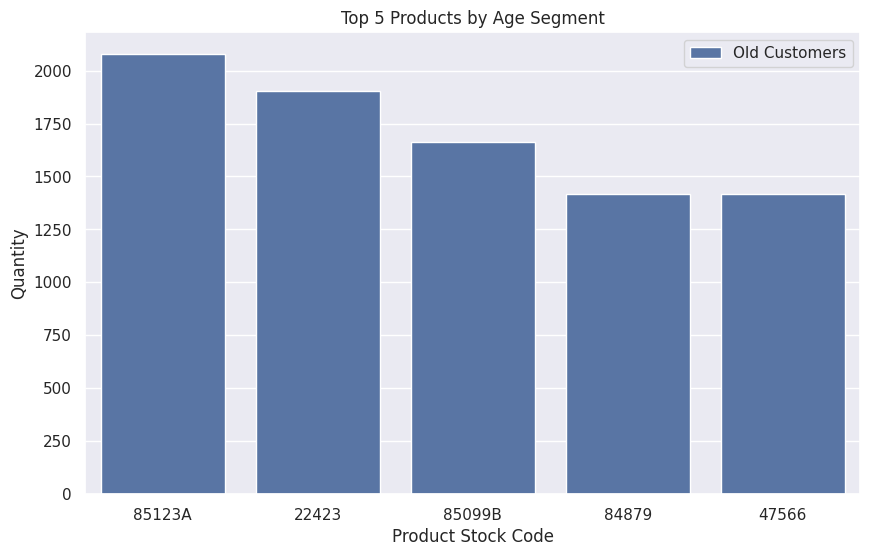

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_products_young.index, y=top_products_young.values, label='Young Customers')
sns.barplot(x=top_products_middle_aged.index, y=top_products_middle_aged.values, label='Middle-Aged Customers')
sns.barplot(x=top_products_old.index, y=top_products_old.values, label='Old Customers')
plt.title('Top 5 Products by Age Segment')
plt.xlabel('Product Stock Code')
plt.ylabel('Quantity')
plt.legend()
plt.show()